In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, PatchTST

from neuralforecast.losses.pytorch import MAE
from neuralforecast.losses.numpy import mae, mse

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
df = pd.read_csv('data/daily_min_temp.csv')
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


,unique_id,ds,y
0,0,1981-01-01,20.7
1,0,1981-01-02,17.9
2,0,1981-01-03,18.8
3,0,1981-01-04,14.6
4,0,1981-01-05,15.8


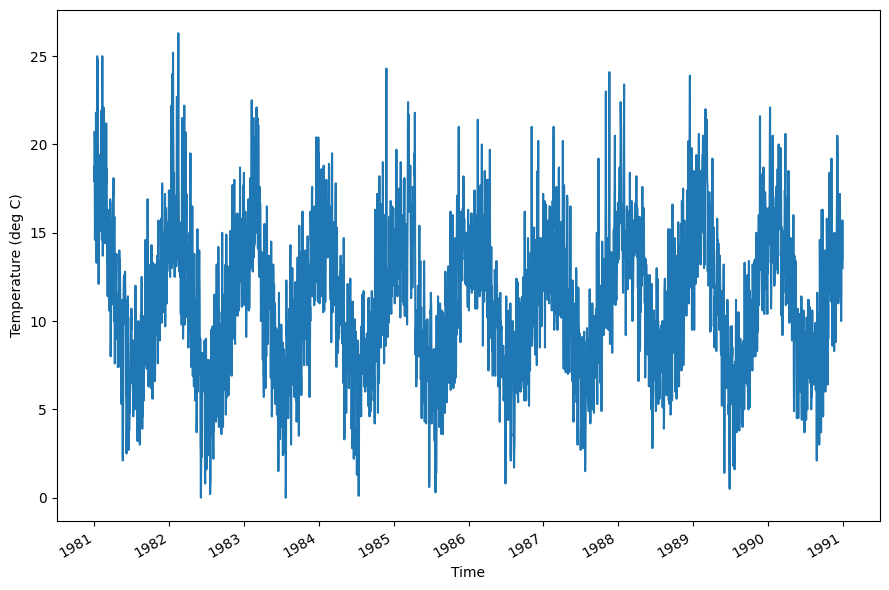

In [11]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(df['ds'], df['y'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (deg C)')

fig.autofmt_xdate()
plt.tight_layout()

## Modeling 

Global seed set to 1
Global seed set to 1
Global seed set to 1


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.33it/s]


,unique_id,ds,cutoff,NHITS,NBEATS,PatchTST,y
0,0,1990-01-01,1989-12-31,12.103071,13.021576,14.137188,14.8
1,0,1990-01-02,1989-12-31,12.217216,12.826750,15.761534,13.3
2,0,1990-01-03,1989-12-31,12.137956,12.146644,13.819924,15.6
3,0,1990-01-04,1989-12-31,12.406482,10.419371,14.883209,14.5
4,0,1990-01-05,1989-12-31,12.891554,13.087984,15.027889,14.3


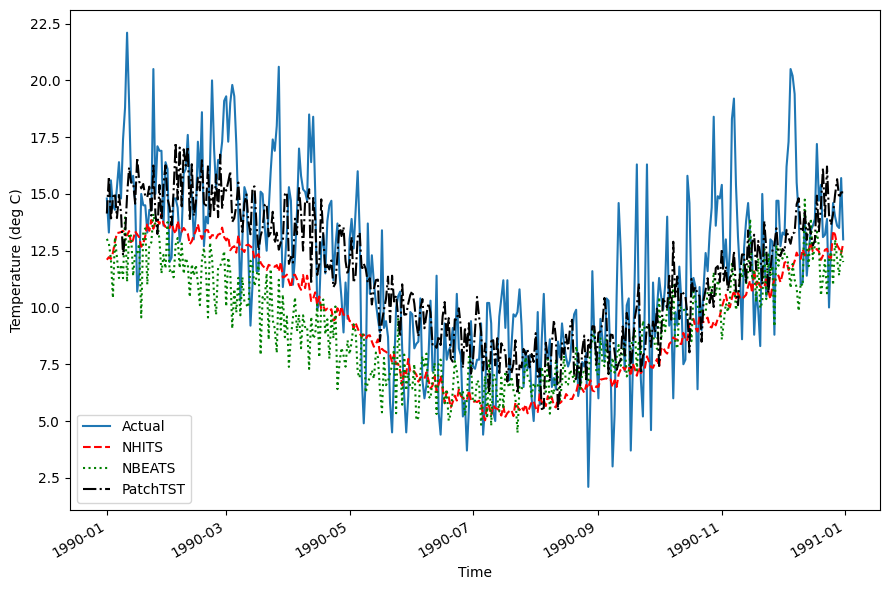

In [18]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(preds_df['ds'], preds_df['y'], label='Actual')
ax.plot(preds_df['ds'], preds_df['NHITS'], label='NHITS', ls='--', color='red')
ax.plot(preds_df['ds'], preds_df['NBEATS'], label='NBEATS', ls=':', color='green')
ax.plot(preds_df['ds'], preds_df['PatchTST'], label='PatchTST', ls='-.', color='black')

ax.legend(loc='best')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (deg C)')

fig.autofmt_xdate()
plt.tight_layout()

In [19]:
data = {'N-HiTS': [mae(preds_df['NHITS'], preds_df['y']), mse(preds_df['NHITS'], preds_df['y'])],
       'N-BEATS': [mae(preds_df['NBEATS'], preds_df['y']), mse(preds_df['NBEATS'], preds_df['y'])],
       'PatchTST': [mae(preds_df['PatchTST'], preds_df['y']), mse(preds_df['PatchTST'], preds_df['y'])]}

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ['mae', 'mse']

metrics_df.style.highlight_min(color='lightgreen', axis=1)

,N-HiTS,N-BEATS,PatchTST
mae,2.677777,3.002652,2.147307
mse,10.965903,14.488882,7.523991
